In [5]:
import pandas as pd
import numpy as np
import sklearn

In [25]:
house_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [34]:
print('Total no. of Rows is',house_data.shape[0], 'and Columns is', house_data.shape[1])

Total no. of Rows is 645 and Columns is 7


In [37]:
house_data

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000
647,1707.840,3,14,3,2,2,65000


In [35]:
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [36]:
house_data.tail()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000
647,1707.840,3,14,3,2,2,65000
648,1376.946,6,7,3,2,1,36000


In [45]:
house_data.rename(columns = {'Living.Room':'Living Room'})
house_data.head(5)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [53]:
#columns = house_data.columns.tolist()

In [54]:
fetaures_name = house_data.columns

In [55]:
fetaures_name

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')

In [56]:
target = house_data.Price

In [60]:
# store the values in dataframe
house_data.columns = fetaures_name
house_data.Price = target

In [62]:
# split X and y
X = house_data.iloc[:, :-1]
y = house_data.iloc[:, -1]

In [114]:
# split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 0)

In [115]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [116]:
# Apply knn
from sklearn.neighbors import KNeighborsRegressor
nn_model = KNeighborsRegressor(n_neighbors = 3)
nn_model.fit(X_train,y_train)
y_pred = nn_model.predict(X_test)

In [117]:
print(nn_model.score(X_train,y_train))
print(nn_model.score(X_test, y_test))

0.8379318282399989
0.6797673010788121


2 19377.723495480164
3 19637.51985714891
4 19393.05620334892
5 20251.505455449445
6 20702.886524322097
7 20980.694720628093
8 20529.565621915084
9 20572.993318850564
10 21151.185128642584
11 21221.74817132649
12 21398.002849888126
13 21480.757886125313
14 21484.86462167781
15 21548.780337152442
16 21568.324124504095
17 21764.94259468422
18 21938.085245793343
19 22127.01663276255


<AxesSubplot:>

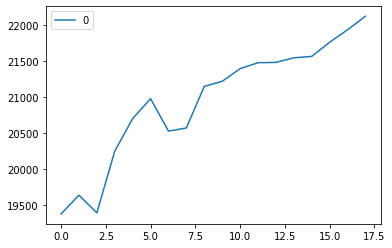

In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = []

for k in range(2, 20):
    nn_model = KNeighborsRegressor(n_neighbors = k)
    nn_model.fit(X_train, y_train)
    y_predict = nn_model.predict(X_test)
    
    
    error = sqrt(mean_squared_error(y_test, y_predict))
    rmse.append(error)
    print(k, error)
    
graph = pd.DataFrame(rmse)
graph.plot()  